In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Import the data sets

In [2]:
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')
df_gender = pd.read_csv('../titanic/gender_submission.csv')

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Exploratory Data Analysis

In [4]:
df_train.head().transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are 177 missing values for Age and 204 missing balues for Cabin.  For the age values, we will attempt to fill in missing values using a regression model based on the other available parameters.  For the Cabin values, we wil first try a simple model that changes this column to a binary datatype that is true if value is non-null and false otherwise.

Lets get the rows where the age column is missing to help determine which information will be usefull for a a regression model to fill these missing values.

In [6]:
df_missing_age = df_train[df_train['Age'].isnull()]

In [7]:
df_missing_age['Parch'].unique()

array([0, 1, 2])

In [8]:
df_train.groupby?

In [9]:
df_train.groupby('Parch')['Age'].agg({'points':['mean','std']})

/home/qsherida/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


points           
            mean        std
Parch                      
0      32.178503  12.570448
1      24.422000  18.283117
2      17.216912  13.193924
3      33.200000  16.709279
4      44.500000  14.617341
5      39.200000   1.095445
6      43.000000        NaN

There is a pretty high variance in the age at each parch value, however we will still try to use it to inform our regression of missing age values.  Furthermore, we see that the relationship between the parche value and age appears to be approximately linear.

In [10]:
df_train['Cabin'] = df_train['Cabin'].apply(lambda x: 1 if x is not None else 0)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [12]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [13]:
df_train[df_train['Name'].str.contains('Mr\.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,1,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,1,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1,C


There appear to be 517 rows that contain Mr.

In [14]:
df_train[df_train['Name'].str.contains('Mrs\.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,1,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,1,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,1,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,1,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,1,S


There are 125 passengers that are Mrs.

In [15]:
df_train[df_train['Name'].str.contains('Miss')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,1,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,1,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,1,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,1,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,1,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,1,C
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1,S


There are 182 passengers that are misses.

In [16]:
df_train.shape[0]

891

In [17]:
891-(517+125+182)

67

There are 67 passengers that are not Mr, Miss, or Misses.  Lets explore more.

In [18]:
df_train[df_train['Name'].str.contains('Dr\.')].shape[0]

7

There are 7 passengers that are Dr.

Lets create a df column that stores the title of each passenger

In [19]:
df_train['title'] = df_train['Name'].apply(lambda x: x.split(',')[1].strip().split(' ')[0])

In [20]:
df_train['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
the            1
Mme.           1
Jonkheer.      1
Capt.          1
Ms.            1
Don.           1
Lady.          1
Sir.           1
Name: title, dtype: int64

Here we can see that there are several titles that only appear less than 10 times that will not contribute much in the title feature. We will simply make all of these titles other.  This should work as they all appear to be dignified titles suggesting these people all would be in the upper echelon.  There is one Single instance of Ms that we will map to Miss.

In [21]:
df_train.loc[df_train['title']=='Ms.'] = 'Miss.'

In [22]:
df_train['title'].value_counts()

Mr.          517
Miss.        183
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Jonkheer.      1
Lady.          1
Don.           1
Sir.           1
Capt.          1
Mme.           1
the            1
Name: title, dtype: int64

In [23]:
df_train['Survived'].unique()

array([0, 1, 'Miss.'], dtype=object)

In [24]:
df_train['Survived'].value_counts()

0        549
1        341
Miss.      1
Name: Survived, dtype: int64

We will droop the one missing person form the dataframe

In [25]:
df_train = df_train.drop(df_train[df_train['Survived']=='Miss.'].index)

In [26]:
df_train['Survived'].value_counts()

0    549
1    341
Name: Survived, dtype: int64

In [27]:
df_train['Survived'] = df_train['Survived'].astype(int)

In [28]:
df_train['Survived'].mean()

0.3831460674157303

In [29]:
df_train.groupby('title')['Survived'].mean()

title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

For the scarce titles, we can see that the Rev. had 0 survivability.  We will simply replace rev with Mr. as this seems appropriate with the mr survivability being at 15%.  The rest of the scarce titles we will replace with 'other' since they all have a survuvability greater than the average.

In [30]:
df_train.loc[df_train['title']=='Rev.', 'title'] = 'Mr.'

In [31]:
over_ten = df_train['title'].value_counts() > 10 

In [32]:
titles_over_ten = list(over_ten[over_ten==True].index)
titles_over_ten

['Mr.', 'Miss.', 'Mrs.', 'Master.']

In [33]:
df_train['title'] = df_train['title'].apply(lambda x: x if x in titles_over_ten else 'Other')


In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,1,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,1,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,1,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,1,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,1,S,Mr.


We will now drop the name column

In [35]:
df_train = df_train.drop('Name', axis=1)

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22,1,0,A/5 21171,7.25,1,S,Mr.
1,2,1,1,female,38,1,0,PC 17599,71.2833,1,C,Mrs.
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.925,1,S,Miss.
3,4,1,1,female,35,1,0,113803,53.1,1,S,Mrs.
4,5,0,3,male,35,0,0,373450,8.05,1,S,Mr.


In [37]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Lets see if we can get any information from the ticket column.

In [38]:
df_train['ticket_type'] = df_train['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]) if len(x.split(' '))>1 else 'None')

In [39]:
df_train['ticket_type'].unique()

array(['A/5', 'PC', 'STON/O2.', 'None', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'SC/AHBasle',
       'A/4', 'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2',
       'S.C./PARIS', 'C.A./SOTON'], dtype=object)

In [40]:
df_train['ticket_type'].value_counts()

None          664
PC             60
C.A.           27
STON/O2.       18
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
S.O.C.          5
C               5
F.C.C.          5
SC/PARIS        5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
WE/P            2
A./5.           2
S.C./PARIS      2
SC/AH           2
P/PP            2
A.5.            2
SOTON/O2        2
A/S             1
SC              1
W/C             1
SCO/W           1
W.E.P.          1
SW/PP           1
Fa              1
S.W./PP         1
S.P.            1
A4.             1
C.A./SOTON      1
SC/AHBasle      1
F.C.            1
SO/C            1
S.O.P.          1
S.C./A.4.       1
Name: ticket_type, dtype: int64

In [41]:
ticket_type_survivability = df_train.groupby(['ticket_type'])['Survived'].agg(['mean', 'count'])
ticket_type_survivability.index

Index(['A./5.', 'A.5.', 'A/4', 'A/4.', 'A/5', 'A/5.', 'A/S', 'A4.', 'C',
       'C.A.', 'C.A./SOTON', 'CA', 'CA.', 'F.C.', 'F.C.C.', 'Fa', 'None',
       'P/PP', 'PC', 'PP', 'S.C./A.4.', 'S.C./PARIS', 'S.O./P.P.', 'S.O.C.',
       'S.O.P.', 'S.P.', 'S.W./PP', 'SC', 'SC/AH', 'SC/AHBasle', 'SC/PARIS',
       'SC/Paris', 'SCO/W', 'SO/C', 'SOTON/O.Q.', 'SOTON/O2', 'SOTON/OQ',
       'STON/O2.', 'SW/PP', 'W./C.', 'W.E.P.', 'W/C', 'WE/P'],
      dtype='object', name='ticket_type')

In [42]:
def get_mod_ticket_type(ticket_type, survival_rate, count):
    if count >= 10:
        return ticket_type
    elif survival_rate == 0: 
        return 'type_0'
    elif 0 < survival_rate <= 0.25:
        return 'type_q1'
    elif 0 < survival_rate <= 0.5:
        return 'type_q2'
    elif 0 < survival_rate <= 1:
        return 'type_q4'
    

In [43]:
ticket_type_survivability['mod_ticket_type'] = ticket_type_survivability.apply(
    lambda x: get_mod_ticket_type(x.name, x['mean'], x['count']), axis=1
)

In [44]:
ticket_type_survivability.groupby('mod_ticket_type')['count'].sum()

mod_ticket_type
A/5          10
C.A.         27
None        664
PC           60
STON/O2.     18
type_0       37
type_q1      39
type_q2      22
type_q4      13
Name: count, dtype: int64

In [45]:
ticket_type_survivability

,mean,count,mod_ticket_type
ticket_type,,,
A./5.,0.000000,2,type_0
A.5.,0.000000,2,type_0
A/4,0.000000,3,type_0
A/4.,0.000000,3,type_0
A/5,0.100000,10,A/5
A/5.,0.142857,7,type_q1
A/S,0.000000,1,type_0
A4.,0.000000,1,type_0
C,0.400000,5,type_q2


For value counts that are less than 10, we will create 4 binned survivability types: 0, <=25, <=50 <=1 

In [46]:
ticket_type_survivability.loc['PP']['mod_ticket_type']

'type_q4'

In [47]:
df_train['mod_ticket_type'] = df_train.apply(lambda x: ticket_type_survivability.loc[x['ticket_type']]['mod_ticket_type'], axis=1)

In [48]:
df_train['ticket_number'] = df_train['Ticket'].apply(lambda x: x.split(' ')[-1] if len(x.split(' '))>1 else x)

In [49]:
df_train['ticket_number'] 

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: ticket_number, Length: 890, dtype: object

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        890 non-null object
Survived           890 non-null int64
Pclass             890 non-null object
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Ticket             890 non-null object
Fare               890 non-null object
Cabin              890 non-null object
Embarked           888 non-null object
title              890 non-null object
ticket_type        890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null object
dtypes: int64(1), object(14)
memory usage: 151.2+ KB


In [51]:
df_train.head().transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,1,1,1,1,1


In [52]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=object)

It is not clear if Pclass is an ordinal value or not, for now we will assume it is.

Now we need to convert categorical column types.

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        890 non-null object
Survived           890 non-null int64
Pclass             890 non-null object
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Ticket             890 non-null object
Fare               890 non-null object
Cabin              890 non-null object
Embarked           888 non-null object
title              890 non-null object
ticket_type        890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null object
dtypes: int64(1), object(14)
memory usage: 151.2+ KB


In [54]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

We will fill the missing values for embarked with the mode


In [55]:
df_train['Embarked'].mode()

0    S
dtype: object

In [56]:
df_train[['Embarked']] = df_train[['Embarked']].fillna(df_train['Embarked'].mode()[0])

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        890 non-null object
Survived           890 non-null int64
Pclass             890 non-null object
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Ticket             890 non-null object
Fare               890 non-null object
Cabin              890 non-null object
Embarked           890 non-null object
title              890 non-null object
ticket_type        890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null object
dtypes: int64(1), object(14)
memory usage: 151.2+ KB


In [58]:
df_train[df_train['ticket_number'].str.contains('LINE')]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,ticket_type,mod_ticket_type,ticket_number
179,180,0,3,male,36,0,0,LINE,0,1,S,Mr.,None,None,LINE
271,272,1,3,male,25,0,0,LINE,0,1,S,Mr.,None,None,LINE
302,303,0,3,male,19,0,0,LINE,0,1,S,Mr.,None,None,LINE
597,598,0,3,male,49,0,0,LINE,0,1,S,Mr.,None,None,LINE


Since we do not have a ticket number for LINE tickets we will replace them with an average ticket number.

In [59]:
np.floor(df_train.loc[df_train['ticket_number'] != 'LINE']['ticket_number'].astype(int).mean())

298405.0

In [60]:
df_train.loc[df_train['ticket_number'] == 'LINE', 'ticket_number'] = np.floor(
    df_train.loc[df_train['ticket_number'] != 'LINE']['ticket_number'].astype(int).mean()
)

df_train.loc[df_train['Ticket'] == 'LINE', 'ticket_type'] = 'LINE'

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 15 columns):
PassengerId        890 non-null object
Survived           890 non-null int64
Pclass             890 non-null object
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Ticket             890 non-null object
Fare               890 non-null object
Cabin              890 non-null object
Embarked           890 non-null object
title              890 non-null object
ticket_type        890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null object
dtypes: int64(1), object(14)
memory usage: 151.2+ KB


In [62]:
df_train['ticket_number'] = df_train['ticket_number'].astype(int)

In [63]:
df_train['Fare'] = df_train['Fare'].astype(float)

In [64]:
df_train['Age']

0       22
1       38
2       26
3       35
4       35
      ... 
886     27
887     19
888    NaN
889     26
890     32
Name: Age, Length: 890, dtype: object

In [65]:
# df_age = df_train[df_train['Age'].notnull()].copy()

In [66]:
#df_age['Age'] = df_age['Age'].astype(int)

Here we will drop columns that we will not use as features

In [67]:
df_train = df_train.drop(['Ticket', 'PassengerId', 'ticket_type'], axis=1)

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
Survived           890 non-null int64
Pclass             890 non-null object
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Fare               890 non-null float64
Cabin              890 non-null object
Embarked           890 non-null object
title              890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null int64
dtypes: float64(1), int64(2), object(9)
memory usage: 130.4+ KB


Lets examine the passenger class column to determine if it is appropriate to represent this column as a ordinal variable.

In [69]:
df_train.groupby(['Pclass', 'Sex'])[['Fare', 'Survived', 'ticket_number']].mean()

Fare  Survived  ticket_number
Pclass Sex                                        
1      female  106.125798  0.968085   42664.627660
       male     67.226127  0.368852   55282.286885
2      female   22.089723  0.920000  125080.186667
       male     19.741782  0.157407  121241.824074
3      female   16.118810  0.500000  406214.173611
       male     12.661633  0.135447  501024.801153

We can see some interesting trends here with regards to the Pclass veriable.  The first class passengers have the highest fair, the highest survivability, and the lowest ticket numbers while the third class passengers have the lowest fare, the lowest survivability, and the highest ticket numbers.  There is a definate ordering to the Pclass values and we can leave them as ordinal veriables or we can convert them to categorical veriables.  Dealers choice.  We will chooose to leave the passenger class as an ordinal veriable as this will make more sense when we try to classify points using a knn model later.  That way the seperation between first and third class passengers will be greater than the seperation between first and second indicating that those classes are more similar.

We will now convert the Pclass veriable to a numeric type.

In [70]:
df_train['Pclass'] = df_train['Pclass'].astype(int)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
Survived           890 non-null int64
Pclass             890 non-null int64
Sex                890 non-null object
Age                713 non-null object
SibSp              890 non-null object
Parch              890 non-null object
Fare               890 non-null float64
Cabin              890 non-null object
Embarked           890 non-null object
title              890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 130.4+ KB


Now we will use one hot incoding to represent categoriacl columns.

In [72]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title,mod_ticket_type,ticket_number
0,0,3,male,22,1,0,7.2500,1,S,Mr.,A/5,21171
1,1,1,female,38,1,0,71.2833,1,C,Mrs.,PC,17599
2,1,3,female,26,0,0,7.9250,1,S,Miss.,STON/O2.,3101282
3,1,1,female,35,1,0,53.1000,1,S,Mrs.,None,113803
4,0,3,male,35,0,0,8.0500,1,S,Mr.,None,373450


In [73]:
df_train['Parch'].value_counts()

0    677
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Here we can see that there are several disperate values within the Parch column.

In [74]:
df_train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.342688
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [75]:
df_train['Parch'] = df_train['Parch'].astype(int)

Lets see if the parch value correlates with other values we have.

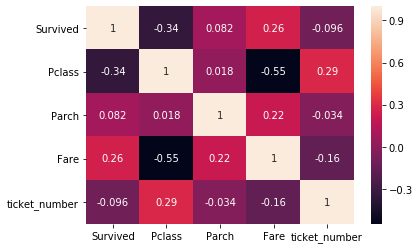

In [76]:
sns.heatmap(df_train.corr(), annot=True)

We can see that botht the Parch and the ticket_number have very little correlation with weather or not a passenger is likely to survive.  However, we can see that it may be important for predicting the age of a passenger.  We may be able to use the Parch to get better predicttions for missing values in the age category.

In [77]:
df_train['Age'] = df_train['Age'].astype('float')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
Survived           890 non-null int64
Pclass             890 non-null int64
Sex                890 non-null object
Age                713 non-null float64
SibSp              890 non-null object
Parch              890 non-null int64
Fare               890 non-null float64
Cabin              890 non-null object
Embarked           890 non-null object
title              890 non-null object
mod_ticket_type    890 non-null object
ticket_number      890 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 130.4+ KB


Now we can convert categorical columns

In [79]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [80]:
df_train.head().transpose()

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass,3.00,1.0000,3.000,1.0,3.00
Age,22.00,38.0000,26.000,35.0,35.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
ticket_number,21171.00,17599.0000,3101282.000,113803.0,373450.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
SibSp_1,1.00,1.0000,0.000,1.0,0.00
SibSp_2,0.00,0.0000,0.000,0.0,0.00
SibSp_3,0.00,0.0000,0.000,0.0,0.00


Now we can traina  regression model to fill issing values for the Age column.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [82]:
df_age = df_train[df_train['Age'].notnull()].copy()

In [83]:
lr = LinearRegression()

In [84]:
y_age = df_age['Age']

In [85]:
X_age = df_age.drop('Age', axis=1)

In [86]:
min_max_age_scaler = MinMaxScaler()

In [87]:
X_age_scaled = min_max_age_scaler.fit_transform(X_age)

In [88]:
X_age_scaled

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [89]:
lr.fit?

In [90]:
lr.fit(X_age_scaled, y_age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
df_age_missing = df_train[df_train['Age'].isnull()]

In [92]:
X_age_missing = df_age_missing.drop('Age', axis=1)

In [93]:
X_age_missing_scaled = min_max_age_scaler.transform(X_age_missing)

In [94]:
lr.predict(X_age_missing_scaled)

array([35.22026771, 32.73907262, 29.07793367, 27.81780684, 22.2941955 ,
       29.75875397, 40.28866696, 22.2968748 , 23.7915554 , 27.95428157,
       27.23691571, 32.13473339, 22.16664981, 21.08750537, 39.59384698,
       42.79394805, -0.54695585, 29.75875073, 29.76818337, 22.29472926,
       29.84798765, 29.76824982, 29.75875357, 25.71854717, 19.15410627,
       27.24945453, 35.24047933, 11.26958934, 32.11837752, 27.33925313,
       29.74034962,  7.62448253, 44.3332083 , 44.60898625, -0.52079642,
       19.48327336, 35.09619054, 43.57197971, 33.3948505 , 35.23980301,
       22.31093321, 28.38657353, 32.17949543, 29.75876126, 11.33799441,
       20.79145324, 15.81186849, 19.20391528, 29.76789847, 43.7482714 ,
       35.24618852, 26.34215408, 43.68485287, 22.31093524, 36.84070656,
       43.71425235, 42.79395088, 39.62356375, 22.1645925 , 24.47643324,
       29.30471499, 31.44124578, 28.43725664, 28.38657353, 15.57313307,
       42.16962433, 29.75875762, 27.92554849, 43.66097604, 27.81

In [95]:
df_train.loc[df_age_missing.index, 'Age'] = lr.predict(X_age_missing_scaled)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 27 columns):
Survived                    890 non-null int64
Pclass                      890 non-null int64
Age                         890 non-null float64
Parch                       890 non-null int64
Fare                        890 non-null float64
ticket_number               890 non-null int64
Sex_male                    890 non-null uint8
SibSp_1                     890 non-null uint8
SibSp_2                     890 non-null uint8
SibSp_3                     890 non-null uint8
SibSp_4                     890 non-null uint8
SibSp_5                     890 non-null uint8
SibSp_8                     890 non-null uint8
Embarked_Q                  890 non-null uint8
Embarked_S                  890 non-null uint8
title_Miss.                 890 non-null uint8
title_Mr.                   890 non-null uint8
title_Mrs.                  890 non-null uint8
title_Other                 890 non-null uint

Now we have our data set to fit a model for predicting the survivability. Lets examine a heatmap of the correlation of these features with the survivability.

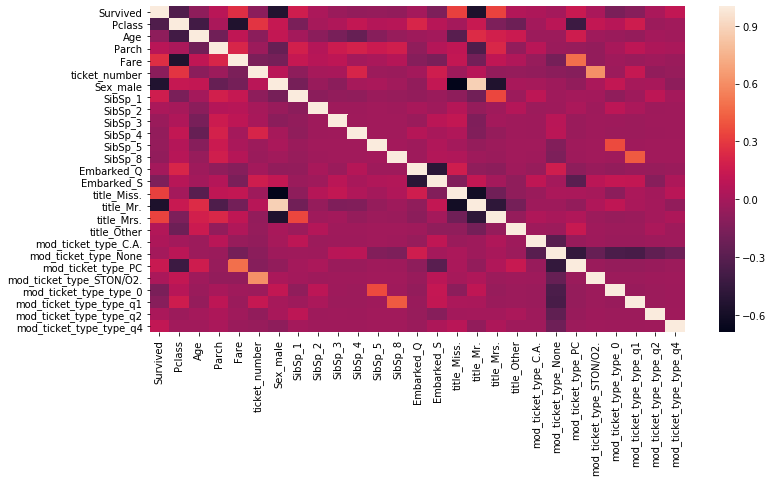

In [97]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr())

We can see that the strongest correlation as to weather or not a person survived is given by their gender, Male or Female.  We can also see a strong correlation between sibsp_1 and the title of Mrs.

In [98]:
y = df_train['Survived']

In [99]:
X = df_train.drop(['Survived'], axis=1)

Now lets try a few different clasiification models to see which one performs best.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix

Lets scale the data set so it can be used with a KNN  classifier

In [101]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

Now lets get train and test data sets to use with the selected model types

In [116]:
train_test_split?

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=101)

First lets try to optimize a KNN classifier

In [120]:
KNeighborsClassifier?

In [121]:
int(np.floor(X.shape[0]**0.5))

29

In [122]:
sns.lineplot?

In [126]:
def knn_elbow_plot(X_train, X_test, y_train, y_test, n_max=int(np.floor(X.shape[0]**0.5)), show_plot=True):
    ks = []
    accuracies = []
    for i in range(1, n_max+1, 1):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        
        accuracy = accuracy_score(y_pred, y_test)
        ks.append(i)
        accuracies.append(accuracy)
    
    if show_plot:
        plt.figure(figsize=(12,6))
        plt.xlabel = 'K'
        plt.y_label = 'Accuracy'
        sns.lineplot(ks, accuracies)
    
    
    best_acuracy = np.max(accuracies)
    max_index = np.argmax(accuracies)
    k_optimal = ks[max_index]
    
    print("\n***k_optimal: ", k_optimal)
    print("\n***best_ccuracy: ", best_acuracy)
    
    return k_optimal, best_acuracy
     


***k_optimal:  10

***best_ccuracy:  0.8385650224215246


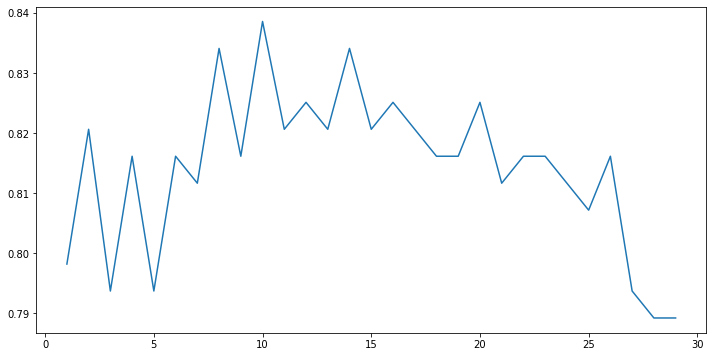

In [115]:
knn_elbow_plot(X_train, X_test, y_train, y_test, n_max=int(np.floor(X.shape[0]**0.5)))

It looks like the best accuracy for the knn classifier occurs at a K value of 10

Lets see if we can improve the performance of the KNN classifier at all by reducing the feature space.

In [123]:
from sklearn.decomposition import PCA

In [145]:
def pca_knn(X, y):
    pca_ns = []
    pcs_optimal_ks = []
    pca_best_accuracy = []
    for i in range(2, X.shape[1]+1, 1):
        
        pca = PCA(n_components=i)
        X_pca = pca.fit_transform(X)
        print('\n ***N_PCA: ', i)
        X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y)
        
        k_optimal, best_acuracy = knn_elbow_plot(X_train_pca, X_test_pca, y_train_pca, y_test_pca, n_max=int(np.floor(X.shape[0]**0.5)), show_plot=False)
        
        pca_ns.append(i)
        pcs_optimal_ks.append(k_optimal)
        pca_best_accuracy.append(best_acuracy)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(pca_ns, pcs_optimal_ks)
    ax1.set_xlim(2, 26)
    ax1.set_xlabel('# PCA Components')
    ax1.set_ylabel('Optimal K in KNN')
    ax1.grid(True)
    
    ax2.plot(pca_ns, pca_best_accuracy)
    ax2.set_xlim(2, 26)
    ax2.set_xlabel('# PCA Components')
    ax2.set_ylabel('Beat Accuracy')
    ax2.grid(True)

    plt.show()
    


 ***N_PCA:  2

***k_optimal:  2

***best_ccuracy:  0.8609865470852018

 ***N_PCA:  3

***k_optimal:  25

***best_ccuracy:  0.7892376681614349

 ***N_PCA:  4

***k_optimal:  2

***best_ccuracy:  0.7937219730941704

 ***N_PCA:  5

***k_optimal:  26

***best_ccuracy:  0.8161434977578476

 ***N_PCA:  6

***k_optimal:  28

***best_ccuracy:  0.852017937219731

 ***N_PCA:  7

***k_optimal:  2

***best_ccuracy:  0.8340807174887892

 ***N_PCA:  8

***k_optimal:  26

***best_ccuracy:  0.7802690582959642

 ***N_PCA:  9

***k_optimal:  18

***best_ccuracy:  0.8385650224215246

 ***N_PCA:  10

***k_optimal:  1

***best_ccuracy:  0.7982062780269058

 ***N_PCA:  11

***k_optimal:  3

***best_ccuracy:  0.8161434977578476

 ***N_PCA:  12

***k_optimal:  14

***best_ccuracy:  0.8699551569506726

 ***N_PCA:  13

***k_optimal:  4

***best_ccuracy:  0.8161434977578476

 ***N_PCA:  14

***k_optimal:  3

***best_ccuracy:  0.8295964125560538

 ***N_PCA:  15

***k_optimal:  11

***best_ccuracy:  0.82959641255

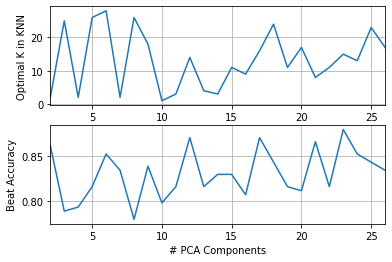

In [146]:
pca_knn(X_scaled, y)

There doesn't seem to be much improvement in the KNN classifier performance when trying to reduce the number of components using PCA.  Furthermore, three is not a clear trend in which value of K is best with most values giving very similar performance.  The best performance happened when 23 features were included using 15 nearest neighbors for classification.

Here we will asses the performance of other models to see if they cann out perform KNN.

In [148]:
df_train['Survived'].mean()

0.3831460674157303

In [150]:
df_train.columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'ticket_number',
       'Sex_male', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Embarked_Q', 'Embarked_S', 'title_Miss.', 'title_Mr.',
       'title_Mrs.', 'title_Other', 'mod_ticket_type_C.A.',
       'mod_ticket_type_None', 'mod_ticket_type_PC',
       'mod_ticket_type_STON/O2.', 'mod_ticket_type_type_0',
       'mod_ticket_type_type_q1', 'mod_ticket_type_type_q2',
       'mod_ticket_type_type_q4'],
      dtype='object')

In [151]:
df_train.groupby('Sex_male')['Survived'].mean()

Sex_male
0    0.741214
1    0.188908
Name: Survived, dtype: float64

In [147]:
RandomForestClassifier?

In [152]:
rfc = RandomForestClassifier()

In [153]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
y_pred_rfc = rfc.predict(X_test)

In [164]:
accuracy_rfc = accuracy_score(y_pred_rfc, y_test)
accuracy_rfc

0.8385650224215246

In [173]:
rfc = RandomForestClassifier(max_depth=6)

In [174]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
y_pred_rfc = rfc.predict(X_test)

In [176]:
accuracy_rfc = accuracy_score(y_pred_rfc, y_test)
accuracy_rfc

0.8116591928251121

In [158]:
LogisticRegression?

In [159]:
lr = LogisticRegression()

In [160]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred_lr = lr.predict(X_test)

In [163]:
accuracy_lr = accuracy_score(y_pred_lr, y_test)
accuracy_lr

0.8071748878923767

In [178]:
svc = SVC()

In [179]:
svc.fit(X_train, y_train)
y_pred_lr = svc.predict(X_test)
accuracy_svc = accuracy_score(y_pred_lr, y_test)
accuracy_svc

0.8116591928251121

In [111]:
def prep_data(df, age_model):
#     create title column
#  drop name column
# convert survived column to binary
# 

SyntaxError: unexpected EOF while parsing (<ipython-input-111-ccd63d9667a6>, line 5)